In [1]:
import numpy as np
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D

In [2]:
dir = "../Grouped/train/"
train_data = []
img_size = 32
for i in os.listdir(dir):
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [3]:
len(train_data)

47200

In [4]:
val_dir = "../Grouped/test/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [5]:
len(val_data)

11800

In [6]:
random.shuffle(train_data)
random.shuffle(val_data)

In [7]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [8]:
train_Y

['ga',
 'be_bi',
 'ka',
 'lo_lu',
 'yo_yu',
 'ga',
 'pa',
 'ya',
 'na',
 'go_gu',
 'ngo_ngu',
 'y',
 'mo_mu',
 'ke_ki',
 'm',
 'ta',
 'ng',
 'ne_ni',
 'ngo_ngu',
 'o_u',
 's',
 'ng',
 'me_mi',
 'wo_wu',
 'a',
 'da',
 'a',
 'le_li',
 'w',
 'l',
 'se_si',
 'ya',
 'yo_yu',
 'la',
 'wa',
 'yo_yu',
 'go_gu',
 'te_ti',
 'h',
 'ma',
 'go_gu',
 'y',
 'ho_hu',
 'da',
 'ye_yi',
 'pa',
 'ne_ni',
 't',
 'nga',
 'ko_ku',
 'la',
 'he_hi',
 'pe_pi',
 'ne_ni',
 'go_gu',
 'ka',
 'ko_ku',
 'h',
 'he_hi',
 'me_mi',
 'we_wi',
 'p',
 'ge_gi',
 'e_i',
 'ga',
 'ya',
 't',
 'do_du',
 'de_di',
 'we_wi',
 'nga',
 'we_wi',
 'na',
 'ko_ku',
 'na',
 'n',
 'ge_gi',
 'ng',
 'ba',
 'to_tu',
 'do_du',
 'ye_yi',
 'ga',
 'n',
 'ke_ki',
 'no_nu',
 'p',
 'go_gu',
 'y',
 'n',
 'g',
 'ge_gi',
 'pa',
 'sa',
 'mo_mu',
 'p',
 'wa',
 'b',
 'le_li',
 'nga',
 'd',
 'ha',
 'po_pu',
 'ko_ku',
 'po_pu',
 'ba',
 'da',
 'w',
 'la',
 'm',
 'ya',
 'w',
 'g',
 'ge_gi',
 'da',
 'nge_ngi',
 'go_gu',
 'lo_lu',
 'so_su',
 'h',
 'lo_lu',
 'so

In [9]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [10]:
val_Y

['se_si',
 'n',
 'be_bi',
 'n',
 'k',
 'go_gu',
 'la',
 'bo_bu',
 'de_di',
 'da',
 'we_wi',
 'm',
 'ma',
 'na',
 'to_tu',
 'go_gu',
 'se_si',
 'ne_ni',
 'b',
 'do_du',
 's',
 'ta',
 'ho_hu',
 'de_di',
 'yo_yu',
 'y',
 'ya',
 'ge_gi',
 'bo_bu',
 'mo_mu',
 'nge_ngi',
 'ge_gi',
 'ye_yi',
 'po_pu',
 'ng',
 'n',
 'se_si',
 'so_su',
 'go_gu',
 'bo_bu',
 'lo_lu',
 'ko_ku',
 'ga',
 'do_du',
 'na',
 'm',
 't',
 'ho_hu',
 'bo_bu',
 'a',
 'yo_yu',
 'h',
 'nge_ngi',
 'mo_mu',
 'ge_gi',
 'ta',
 'ka',
 'h',
 'ba',
 'pa',
 'd',
 'b',
 'm',
 'me_mi',
 'ye_yi',
 'nga',
 'ya',
 'to_tu',
 'ha',
 'sa',
 'do_du',
 'bo_bu',
 'do_du',
 'wo_wu',
 'w',
 'l',
 'n',
 'ma',
 'ko_ku',
 'pe_pi',
 'ge_gi',
 'be_bi',
 'yo_yu',
 'd',
 's',
 'mo_mu',
 'da',
 'da',
 'l',
 'te_ti',
 'no_nu',
 'bo_bu',
 'go_gu',
 'bo_bu',
 'be_bi',
 'po_pu',
 'o_u',
 'ga',
 'pe_pi',
 'wo_wu',
 'le_li',
 'do_du',
 'po_pu',
 'k',
 'ye_yi',
 't',
 'wa',
 'ma',
 'k',
 'to_tu',
 'se_si',
 'yo_yu',
 'to_tu',
 'g',
 'de_di',
 'w',
 'ya',
 'l',
 

In [11]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [12]:
val_Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [14]:
train_Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [15]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [16]:
print(train_X.shape,val_X.shape)

(47200, 32, 32, 1) (11800, 32, 32, 1)


In [17]:
print(train_Y.shape,val_Y.shape)

(47200, 59) (11800, 59)


In [18]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(59, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [19]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [20]:
history = model.fit(train_X,train_Y, epochs=10, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/10
1475/1475 [==============================] - 12s 6ms/step - loss: 1.3111 - accuracy: 0.6415 - val_loss: 0.3224 - val_accuracy: 0.9043
Epoch 2/10
1475/1475 [==============================] - 9s 6ms/step - loss: 0.3929 - accuracy: 0.8755 - val_loss: 0.1864 - val_accuracy: 0.9411
Epoch 3/10
1475/1475 [==============================] - 9s 6ms/step - loss: 0.2813 - accuracy: 0.9097 - val_loss: 0.1512 - val_accuracy: 0.9522
Epoch 4/10
1475/1475 [==============================] - 9s 6ms/step - loss: 0.2270 - accuracy: 0.9265 - val_loss: 0.1282 - val_accuracy: 0.9606
Epoch 5/10
1475/1475 [==============================] - 8s 6ms/step - loss: 0.1931 - accuracy: 0.9382 - val_loss: 0.0987 - val_accuracy: 0.9705
Epoch 6/10
1475/1475 [==============================] - 9s 6ms/step - loss: 0.1685 - accuracy: 0.9463 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 7/10
1475/1475 [==============================] - 9s 6ms/step - loss: 0.1541 - accuracy: 0.9506 - val_loss: 0.0900 - val_accuracy

In [21]:
model.save_weights("model1.h5")

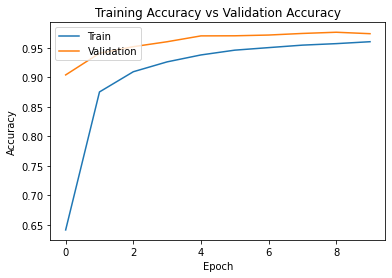

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

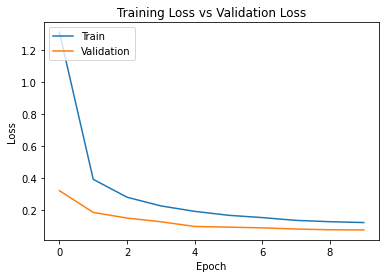

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [25]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 33), 0)
    thresh1 = cv2.threshold(blurred ,160,255,cv2.THRESH_BINARY_INV)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,9))
    dilated = cv2.dilate(thresh1, kernel, iterations=1)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(-1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [26]:
def get_word(letter):
    word = "".join(letter)
    return word

['sa', 'nge_ngi', 'nge_ngi', 'nge_ngi', 'nge_ngi']


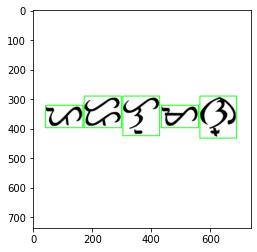

In [27]:
letter,image = get_letters("C:/Users/Daniel/Desktop/Thesis Project/Baybayin OCR/Test/PARALUMAN.jpg")
word = get_word(letter)
print(letter)
plt.imshow(image)